In [1]:
import numpy as np
import merg_rates3 as merg_rates
from progressbar import ProgressBar

In [2]:
import matplotlib as mpl 
mpl.use('Agg')
import matplotlib.pyplot as plt 
from matplotlib import rcParams
%matplotlib inline

rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['font.family'] = 'serif' 
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.grid']=True
rcParams['axes.titlesize']=24
rcParams['figure.titlesize']=24
rcParams['axes.labelsize']=20
rcParams['axes.titlepad']=15
rcParams['legend.frameon'] = True
rcParams['legend.facecolor']='white'
rcParams['legend.fontsize']=18

In [3]:
pertxt='P$\mathrm{\\acute{e}}$rez-Gonz$\mathrm{\\acute{a}}$lez'

In [4]:
htpm=merg_rates.HalTreepmClass()

# in merg_rates3.HalTreepm():
  read /data1/arwetzel/lcdm250/snapshot.txt
  read  5177765 subhalo from subhalo_tree_00.dat
  read  5407196 subhalo from subhalo_tree_01.dat
  read  5485481 subhalo from subhalo_tree_02.dat
  read  5517336 subhalo from subhalo_tree_03.dat
  read  5548084 subhalo from subhalo_tree_04.dat
  read  5583078 subhalo from subhalo_tree_05.dat
  read  5615345 subhalo from subhalo_tree_06.dat
  read  5650410 subhalo from subhalo_tree_07.dat
  read  5682696 subhalo from subhalo_tree_08.dat
  read  5715688 subhalo from subhalo_tree_09.dat
  read  5748795 subhalo from subhalo_tree_10.dat
  read  5779167 subhalo from subhalo_tree_11.dat
  read  5805949 subhalo from subhalo_tree_12.dat
  read  5824060 subhalo from subhalo_tree_13.dat
  read  5837797 subhalo from subhalo_tree_14.dat
  read  5841491 subhalo from subhalo_tree_15.dat
  read  5836226 subhalo from subhalo_tree_16.dat
  read  5823060 subhalo from subhalo_tree_17.dat
  read  5795900 subhalo from subhalo_tree_18

In [5]:
scat=0.
mmin=3.

mar_tpm=merg_rates.GalTreepmClass(htpm,
                                  source=merg_rates.bld_smf_compo('marchesini'),
                                  scat=scat,
                                  mmin=mmin)
per_tpm=merg_rates.GalTreepmClass(htpm,
                                  source=merg_rates.bld_smf_compo('perez'),
                                  scat=scat,
                                  mmin=mmin)
san_tpm=merg_rates.GalTreepmClass(htpm,
                                  source=merg_rates.bld_smf_compo('santini'),
                                  scat=scat,
                                  mmin=mmin)
fon_tpm=merg_rates.GalTreepmClass(htpm, 
                                  source=merg_rates.bld_smf_compo('fontana'),
                                  scat=scat, mmin=mmin)

tpms=[mar_tpm, per_tpm, san_tpm, fon_tpm]
for tpm in tpms:
    htpm.mp_tree(gal_tpm=tpm)
    htpm.merg_tree(gal_tpm=tpm)

running SHAM


100% |########################################################################|


running SHAM


100% |########################################################################|


running SHAM


100% |########################################################################|


running SHAM


100% |########################################################################|


building main progenitor tree:


100% |########################################################################|


building merger tree


building main progenitor tree:


100% |########################################################################|


building merger tree


building main progenitor tree:


100% |########################################################################|


building merger tree


building main progenitor tree:


100% |########################################################################|


building merger tree


# $\frac{dN}{dz}(z)$

In [44]:
def plt_dNdx_ofz(tpm, typ, dx, Mcond, smf_lbl, ziend=34, ylim=None,
                 xlim=None, scalefac=False, through=False, Mwid=0.5):     
    import importlib
    importlib.reload(merg_rates)
    htpm.dNdx_ofz=merg_rates.HalTreepmClass.dNdx_ofz.__get__(htpm, merg_rates.HalTreepmClass)
    
    dNdxs_gal_3=htpm.dNdx_ofz(galtpm=tpm, Mcond=Mcond, zi_Mcond=0,
                              mu_cond=np.log10(1./3.),
                              typ=typ, dx=dx,
                              ziend=ziend, through=through)
    dNdxs_gal_10=htpm.dNdx_ofz(galtpm=tpm, Mcond=Mcond, zi_Mcond=0,
                               mu_cond=np.log10(1./10.),
                               typ=typ, dx=dx,
                               ziend=ziend, through=through)

    fig=plt.figure(figsize=(8,6))
    ax=fig.add_subplot(111)
    
    x3=np.array(dNdxs_gal_3[0])
    x10=np.array(dNdxs_gal_10[0])
    if scalefac:
        x3=1./(1.+x3)
        x10=1./(1.+x10)
        ax.set_xlabel('$a$')
    else:
        ax.set_xlabel('$z$')
    
    ax.plot(x3, dNdxs_gal_3[1],
            label='$\mu\geq\\frac{1}{3}$')
    ax.plot(x10, dNdxs_gal_10[1],
            label='$\mu\geq\\frac{1}{10}$')
    if dx=='dz':
        ax.set_ylabel('$\\frac{{dN}}{{{0}}}$ / [mergers / galaxy / z]'.format(dx))
    elif dx=='dt':
        ax.set_ylabel('$\\frac{{dN}}{{{0}}}$ / [mergers / galaxy / Gyr]'.format(dx))
    else:
        raise ValueError('unexpected dx')
    ax.set_yscale('log')
    if tpm is None:
        ax.set_title('{0}'
                     '\n$M_0=10^{{{1:0.1f}\pm{2:0.2f}}}$ M$_\odot$'
                     .format(smf_lbl, Mcond, Mwid/2.))
    else:
        ax.set_title('{0}'
                     '\n$M_0=10^{{{1:0.1f}}\pm{{3:0.2f}}}$ M$_\odot$'
                     ', $\sigma={2:0.1f}$'.format(smf_lbl, Mcond, tpm.scat, Mwid/2.))
    if ylim:
        ax.set_ylim(ylim[0],ylim[1])
    if xlim:
        ax.set_xlim(xlim[0],xlim[1])
    ax.legend()
    plt.show()
    
    return None

In [15]:
def panel_dNdx_ofz(ax, tpm, typ, dx, Mcond, ziend=34):     
    dNdxs_gal_3=htpm.dNdx_ofz(galtpm=tpm, Mcond=Mcond, zi_Mcond=0,
                              mu_cond=np.log10(1./3.),
                              typ=typ, dx=dx,
                              ziend=ziend)
    dNdxs_gal_10=htpm.dNdx_ofz(galtpm=tpm, Mcond=Mcond, zi_Mcond=0,
                               mu_cond=np.log10(1./10.),
                               typ=typ, dx=dx,
                               ziend=ziend)

    ax.plot(dNdxs_gal_3[0],dNdxs_gal_3[1],
            label='$\mu=\\frac{1}{3}$')
    ax.plot(dNdxs_gal_10[0],dNdxs_gal_10[1],
            label='$\mu=\\frac{1}{10}$')
    ax.set_xlabel('$z$')
    if dx=='dz':
        ax.set_ylabel('$\\frac{{dN}}{{{0}}}$ / [mergers / galaxy / z]'.format(dx))
    elif dx=='dt':
        ax.set_ylabel('$\\frac{{dN}}{{{0}}}$ / [mergers / galaxy / Gyr]'.format(dx))
    else:
        raise ValueError('unexpected dx')
    ax.yaxis.set_label_coords(x=-0.14,y=0.5)
    ax.set_yscale('log')
    
    return None

def fig_dNdx_ofz(tpm, typ, Mcond, smf_lbl, ziend=34):
    
    fig = plt.figure(figsize=(12,5))
    
    ax1=fig.add_subplot(121)
    panel_dNdx_ofz(ax1, tpm, typ, dx='dz', Mcond=Mcond, ziend=ziend)
    ax2=fig.add_subplot(122)
    panel_dNdx_ofz(ax2, tpm, typ, dx='dt', Mcond=Mcond, ziend=ziend)
    
    y=0.91
    if tpm is None:
        plt.suptitle('{0}'
                     '\n$M_0=10^{{{1:0.1f}}}$ M$_\odot$'
                     .format(smf_lbl,Mcond),
                     y=y, va='bottom')
    else:
        plt.suptitle('{0}'
                     '\n$M_0=10^{{{1:0.1f}}}$ M$_\odot$'
                     ', $\sigma={2:0.1f}$'.format(smf_lbl,Mcond,tpm.scat),
                     y=y, va='bottom')
    fig.subplots_adjust(wspace=0.3)
    ax2.legend(fontsize=16)
    plt.show()
    
    return None

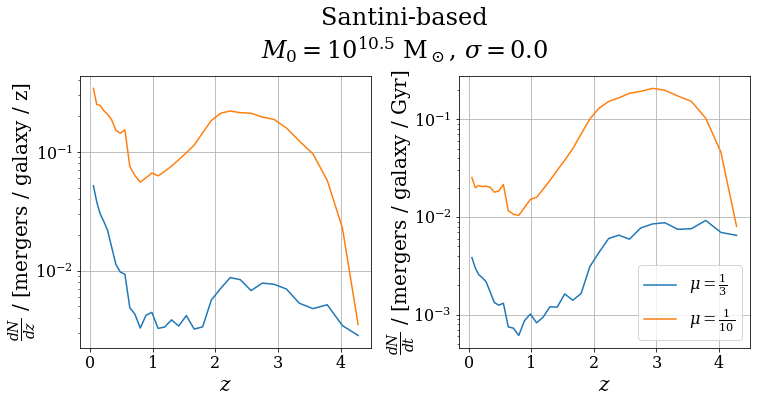

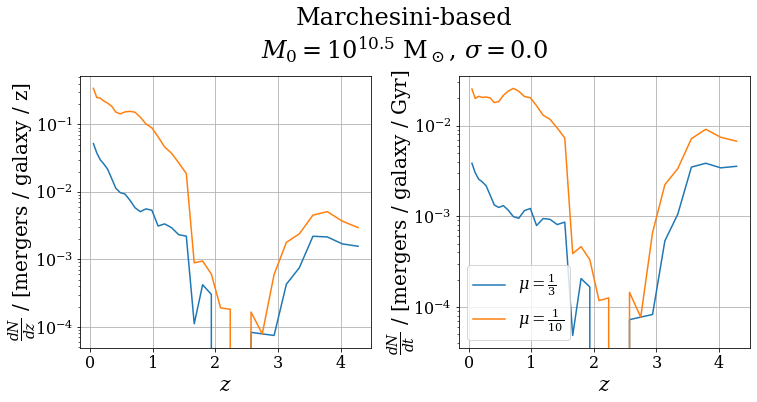

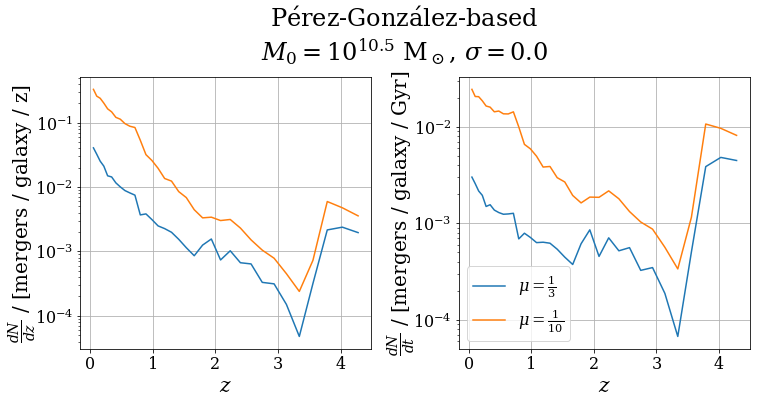

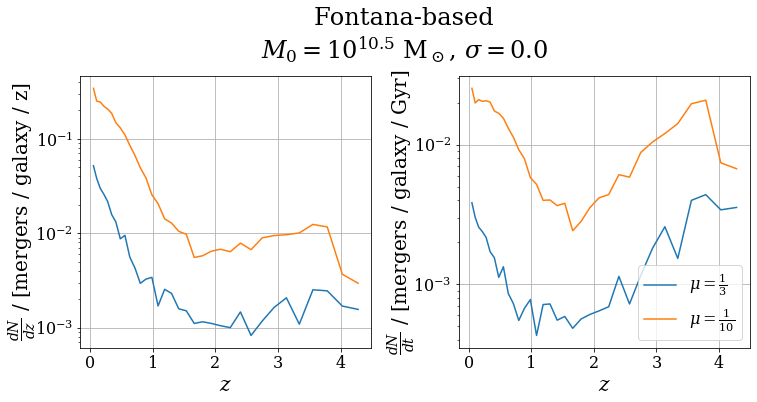

building main progenitor tree:


100% |########################################################################|


building merger tree


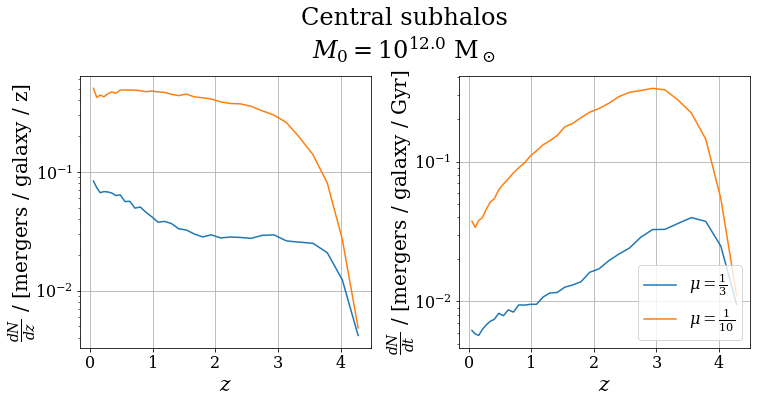

In [8]:
for tpm, lbl in zip([san_tpm, mar_tpm, per_tpm, fon_tpm],
                    ['Santini-based', 'Marchesini-based', pertxt+'-based', 'Fontana-based']):
    fig_dNdx_ofz(tpm, typ='cengal', Mcond=10.5, smf_lbl=lbl, ziend=34)
fig_dNdx_ofz(tpm=None, typ='censubhal', Mcond=12., smf_lbl='Central subhalos', ziend=34)

/home/users/staudt/envs/mergerspython36env/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


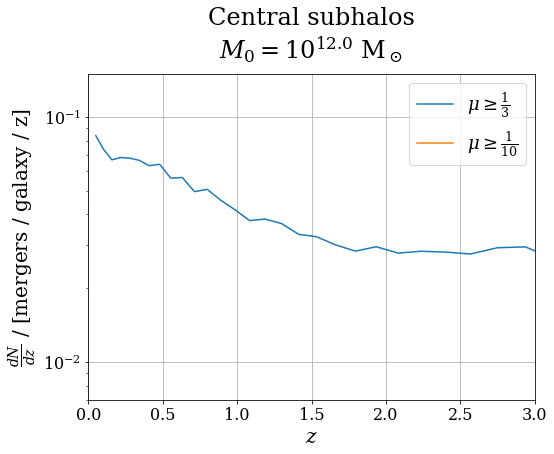

In [14]:
plt_dNdx_ofz(None, typ='censubhal', dx='dz', Mcond=12., 
             smf_lbl='Central subhalos', ziend=34, 
             ylim=[7e-3,1.5e-1], xlim=[0,3])

/home/users/staudt/envs/mergerspython36env/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


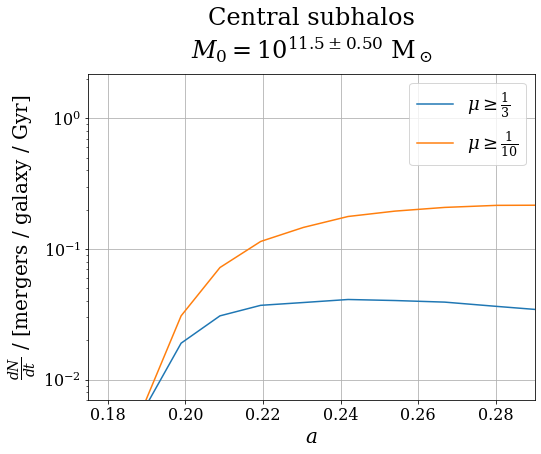

In [45]:
plt_dNdx_ofz(None, typ='censubhal', dx='dt', Mcond=11.5, 
             smf_lbl='Central subhalos', ziend=34, 
             ylim=[7e-3,2.2], xlim=[0.175,0.29], scalefac=True,
             through=False, Mwid=1.)

/home/users/staudt/envs/mergerspython36env/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


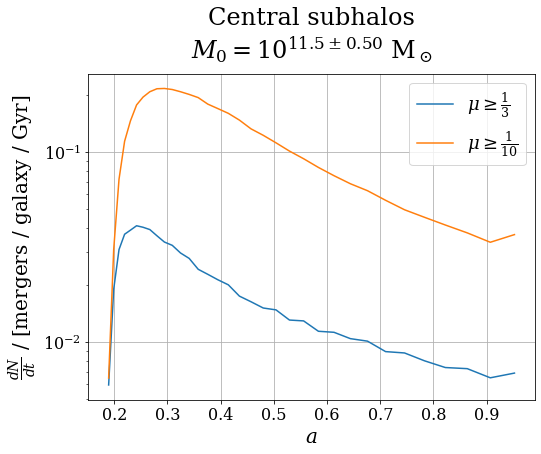

In [49]:
plt_dNdx_ofz(None, typ='censubhal', dx='dt', Mcond=11.5,
             Mwid=1.,
             smf_lbl='Central subhalos', ziend=34, 
             ylim=None, xlim=None, scalefac=True,
             through=False)

/home/users/staudt/envs/mergerspython36env/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


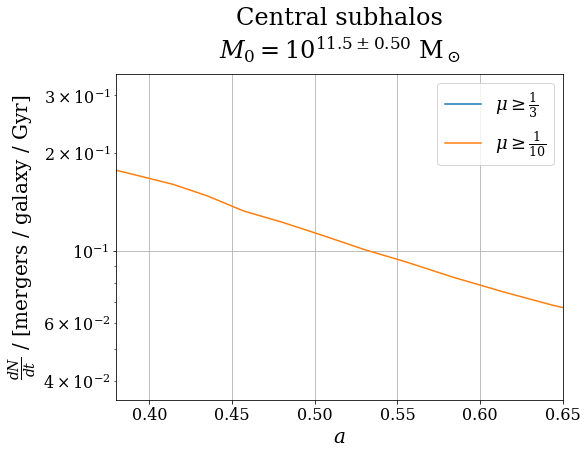

In [54]:
plt_dNdx_ofz(None, typ='censubhal', dx='dt', Mcond=11.5,
             Mwid=1.,
             smf_lbl='Central subhalos', ziend=34, 
             ylim=[3.5e-2,0.35], xlim=[0.38,0.65], scalefac=True,
             through=False)

/home/users/staudt/envs/mergerspython36env/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


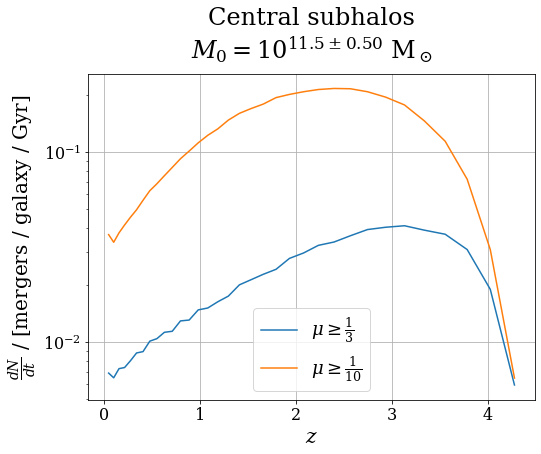

In [50]:
plt_dNdx_ofz(None, typ='censubhal', dx='dt', Mcond=11.5,
             Mwid=1.,
             smf_lbl='Central subhalos', ziend=34, 
             ylim=None, xlim=None, scalefac=False,
             through=False)

  read /data1/arwetzel/lcdm250/snapshot.txt
  read  3914367 halo from halo_tree_00.dat
  read  3939586 halo from halo_tree_01.dat
  read  3964156 halo from halo_tree_02.dat
  read  3991148 halo from halo_tree_03.dat
  read  4017802 halo from halo_tree_04.dat
  read  4043082 halo from halo_tree_05.dat
  read  4068695 halo from halo_tree_06.dat
  read  4091273 halo from halo_tree_07.dat
  read  4114245 halo from halo_tree_08.dat
  read  4134906 halo from halo_tree_09.dat
  read  4156401 halo from halo_tree_10.dat
  read  4175240 halo from halo_tree_11.dat
  read  4191460 halo from halo_tree_12.dat
  read  4201253 halo from halo_tree_13.dat
  read  4207986 halo from halo_tree_14.dat
  read  4208029 halo from halo_tree_15.dat
  read  4202839 halo from halo_tree_16.dat
  read  4189843 halo from halo_tree_17.dat
  read  4168435 halo from halo_tree_18.dat
  read  4135114 halo from halo_tree_19.dat
  read  4092177 halo from halo_tree_20.dat
  read  4036281 halo from halo_tree_21.dat
  read  39

building main progenitor tree:


100% |########################################################################|


building merger tree


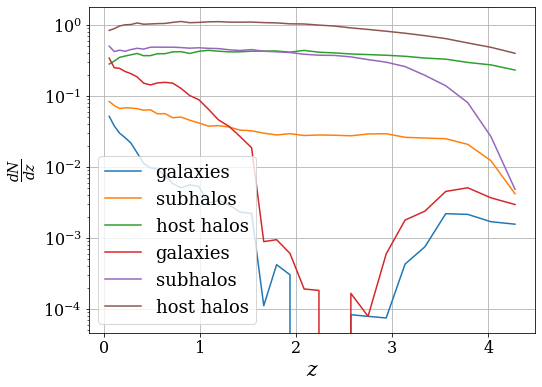

In [9]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)

mu=np.log10(1./3.)
zs_gal,dNdzs_gal=htpm.dNdx_ofz(10.5,mu,
                               'cengal',dx='dz',
                               galtpm=mar_tpm, ziend=34)
zs_sub,dNdzs_sub=htpm.dNdx_ofz(12.,mu,
                               'censubhal',dx='dz',ziend=34)
zs_host,dNdzs_host=htpm.dNdx_ofz(12.,mu,'host',
                                 dx='dz',ziend=34)
ax.plot(zs_gal,dNdzs_gal,
        label='galaxies')
ax.plot(zs_sub,dNdzs_sub,
        label='subhalos')
ax.plot(zs_host,dNdzs_host,
        label='host halos')

mu=np.log10(1./10.)
zs_gal,dNdzs_gal=htpm.dNdx_ofz(10.5,mu,
                               'cengal',dx='dz',
                               galtpm=mar_tpm, ziend=34)
zs_sub,dNdzs_sub=htpm.dNdx_ofz(12.,mu,
                               'censubhal',dx='dz',ziend=34)
zs_host,dNdzs_host=htpm.dNdx_ofz(12.,mu,'host',
                                 dx='dz',ziend=34)
ax.plot(zs_gal,dNdzs_gal,
        label='galaxies')
ax.plot(zs_sub,dNdzs_sub,
        label='subhalos')
ax.plot(zs_host,dNdzs_host,
        label='host halos')

ax.set_xlabel('$z$')
ax.set_ylabel('$\\frac{dN}{dz}$')
ax.set_yscale('log')
#ax.set_ylim(0,4)
ax.legend()
plt.show()